In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff0ac872ee548d4e465ee0a26b2803c2


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | burnie
Processing Record 2 of Set 1 | bodden town
Processing Record 3 of Set 1 | merauke
Processing Record 4 of Set 1 | talcahuano
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | acuna
City not found. Skipping...
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | vila
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | aitape
Processing Record 18 of Set 1 | tsabong
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | sur
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | illoqqortoormiut
Cit

Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | constantine
Processing Record 42 of Set 4 | ozgon
City not found. Skipping...
Processing Record 43 of Set 4 | tomatlan
Processing Record 44 of Set 4 | bitung
Processing Record 45 of Set 4 | olafsvik
City not found. Skipping...
Processing Record 46 of Set 4 | panaba
Processing Record 47 of Set 4 | manakara
Processing Record 48 of Set 4 | san jeronimo
Processing Record 49 of Set 4 | hemsedal
Processing Record 50 of Set 4 | rungata
City not found. Skipping...
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | freeport
Processing Record 3 of Set 5 | ginda
Processing Record 4 of Set 5 | atasu
Processing Record 5 of Set 5 | ambovombe
Processing Record 6 of Set 5 | segovia
Processing Record 7 of Set 5 | flin flon
Processing Record 8 of Set 5 | puerto carreno
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | mayumba
Processing Record 11 of Set 5 | vereya
Processing Record 12 of Set 

Processing Record 25 of Set 8 | zavodskoy
Processing Record 26 of Set 8 | sokoni
Processing Record 27 of Set 8 | alyangula
Processing Record 28 of Set 8 | veglie
Processing Record 29 of Set 8 | ojinaga
Processing Record 30 of Set 8 | vadso
Processing Record 31 of Set 8 | warqla
City not found. Skipping...
Processing Record 32 of Set 8 | miquelon
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | idritsa
Processing Record 35 of Set 8 | mattawa
Processing Record 36 of Set 8 | saint-denis
Processing Record 37 of Set 8 | sibolga
Processing Record 38 of Set 8 | nyagan
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | yining
Processing Record 42 of Set 8 | la rioja
Processing Record 43 of Set 8 | waipawa
Processing Record 44 of Set 8 | saint-remy-de-provence
Processing Record 45 of Set 8 | benjamin hill
Processing Record 46 of Set 8 | north platte
Processing Record 47 of Set 8 | amuntai
Processing R

Processing Record 7 of Set 12 | roma
Processing Record 8 of Set 12 | elko
Processing Record 9 of Set 12 | kutum
Processing Record 10 of Set 12 | florianopolis
Processing Record 11 of Set 12 | sahrak
City not found. Skipping...
Processing Record 12 of Set 12 | coihaique
Processing Record 13 of Set 12 | koungou
City not found. Skipping...
Processing Record 14 of Set 12 | sydney
Processing Record 15 of Set 12 | dujuma
City not found. Skipping...
Processing Record 16 of Set 12 | alvand
Processing Record 17 of Set 12 | huarmey
Processing Record 18 of Set 12 | beloha
Processing Record 19 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 20 of Set 12 | zholymbet
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | goundam
Processing Record 23 of Set 12 | magaria
Processing Record 24 of Set 12 | mahibadhoo
Processing Record 25 of Set 12 | varna
Processing Record 26 of Set 12 | katsuura
Processing Record 27 of Set 12 | salalah
Processing Record 28 of Set 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burnie,-41.05,145.91,52.00,94,39,5.99,AU,2019-11-08 20:21:59
1,Bodden Town,19.28,-81.25,88.00,88,75,5.82,KY,2019-11-08 20:22:00
2,Merauke,-8.49,140.40,71.91,93,100,1.36,ID,2019-11-08 20:22:00
3,Talcahuano,-36.72,-73.12,71.60,43,37,19.46,CL,2019-11-08 20:22:00
4,Port Alfred,-33.59,26.89,60.01,80,97,3.80,ZA,2019-11-08 20:22:00
5,Upernavik,72.79,-56.15,5.67,64,0,9.55,GL,2019-11-08 20:17:05
6,Puerto Ayora,-0.74,-90.35,78.80,61,75,3.36,EC,2019-11-08 20:22:01
7,Saint-Philippe,45.36,-73.48,34.00,68,20,14.99,CA,2019-11-08 20:22:01
8,Longyearbyen,78.22,15.63,30.20,63,75,27.51,NO,2019-11-08 20:22:01
9,Pevek,69.70,170.27,14.32,61,0,6.62,RU,2019-11-08 20:22:01


In [7]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Burnie,AU,2019-11-08 20:21:59,-41.05,145.91,52.00,94,39,5.99
1,Bodden Town,KY,2019-11-08 20:22:00,19.28,-81.25,88.00,88,75,5.82
2,Merauke,ID,2019-11-08 20:22:00,-8.49,140.40,71.91,93,100,1.36
3,Talcahuano,CL,2019-11-08 20:22:00,-36.72,-73.12,71.60,43,37,19.46
4,Port Alfred,ZA,2019-11-08 20:22:00,-33.59,26.89,60.01,80,97,3.80


In [9]:
# Create the output file (CSV).
output_data_file = "../weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Analysis

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

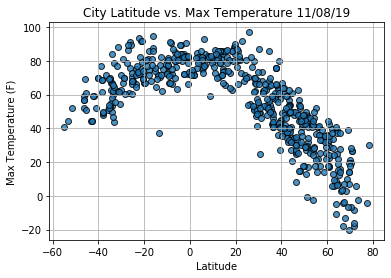

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig1.png")

# Show plot.
plt.show()

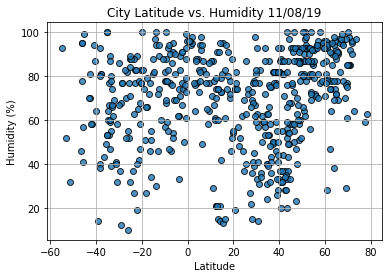

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig2.png")
# Show plot.
plt.show()

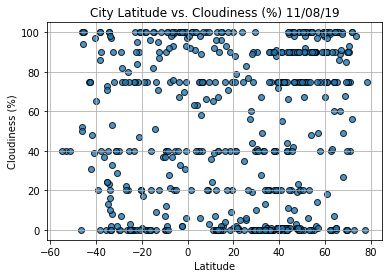

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig3.png")
# Show plot.
plt.show()

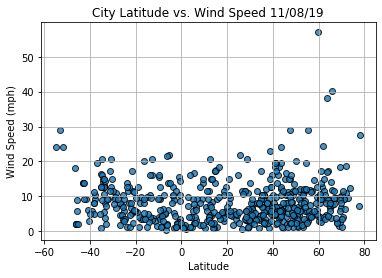

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig4.png")
# Show plot.
plt.show()

### Linear Regression

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                         Vila
Country                        IT
Date          2019-11-08 20:17:04
Lat                         45.18
Lng                           8.4
Max Temp                       50
Humidity                       93
Cloudiness                     90
Wind Speed                   6.93
Name: 13, dtype: object

In [18]:
# Filter for Norther Hemisphere latitudes
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
547     True
548    False
549    False
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [19]:
# DataFrame with data fitting the criteria of latitude >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bodden Town,KY,2019-11-08 20:22:00,19.28,-81.25,88.00,88,75,5.82
5,Upernavik,GL,2019-11-08 20:17:05,72.79,-56.15,5.67,64,0,9.55
7,Saint-Philippe,CA,2019-11-08 20:22:01,45.36,-73.48,34.00,68,20,14.99
8,Longyearbyen,NO,2019-11-08 20:22:01,78.22,15.63,30.20,63,75,27.51
9,Pevek,RU,2019-11-08 20:22:01,69.70,170.27,14.32,61,0,6.62


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

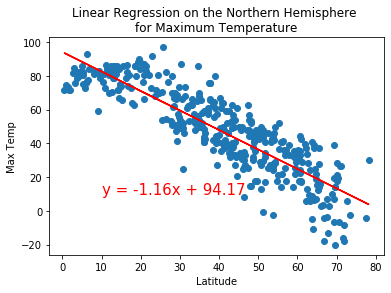

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,10))

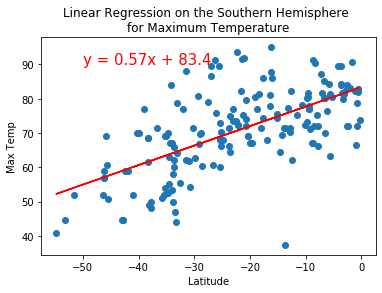

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

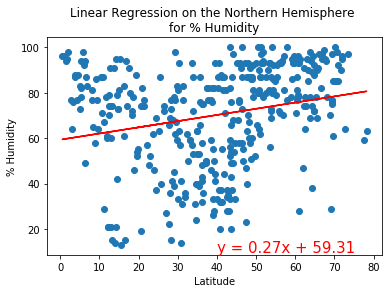

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

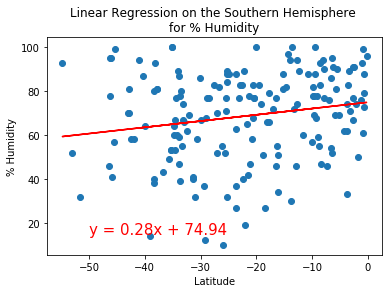

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

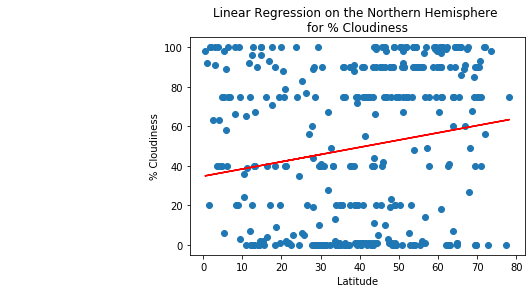

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

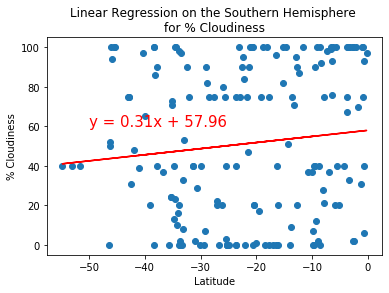

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

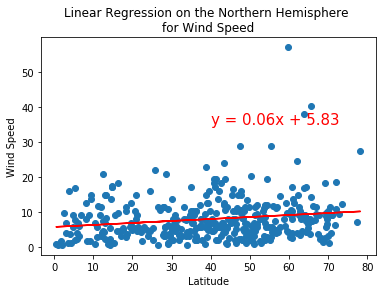

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

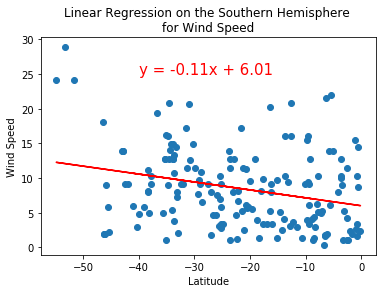

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-40,25))